Assignment 1: Individual Assignment

## Remmy Bisimbeko - B26099 - J24M19/011

You have been provided with a dataset   "Assignment1_Life_Expectancy_Data.csv"
The dataset is a global survey on the life expectancy and the dynamics at play in various countries over a period of several years

Transform the dataset to answer the following questions.

Questions: 
Use the provided data to answer the following questions

1. Which variables have outliers?
2. Which country has the highest life expectancy? 
3. Which country has the highest Adult mortality. 
4. Using visuals, show the distribution of two categorical variables.  
5. Using visuals and statistics, which variables are key in affecting the life expectancy in Uganda? 
6. Which factors are the biggest drivers of Adult mortality? 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the Data Set
df = pd.read_csv("Data Sets/Assignment1_Life_Expectancy_Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33700000.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31700000.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3700000.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2980000.0,18.2,18.2,0.454,9.5


QN 1. Which variables have outliers?

In [7]:
# Let us Calculate the Z-Scores for each variable

# But first, let us rule out non numeric Columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Then do the Z-Scores Calculations
z_scores = np.abs((df_numeric - df_numeric.mean()) / df_numeric.std())

# Define a threshold for outliers, let's say greater than 3
threshold = 3

# NOw, Identify outliers
outliers = z_scores > threshold

# Finally, Print all variables with outliers
variables_with_outliers = outliers.any()
print("Variables with outliers:")
print(variables_with_outliers[variables_with_outliers == True])

Variables with outliers:
Adult Mortality                    True
infant deaths                      True
Alcohol                            True
percentage expenditure             True
Hepatitis B                        True
Measles                            True
under-five deaths                  True
Polio                              True
Total expenditure                  True
Diphtheria                         True
 HIV/AIDS                          True
GDP                                True
Population                         True
 thinness  1-19 years              True
 thinness 5-9 years                True
Income composition of resources    True
Schooling                          True
dtype: bool


QN 2. Which country has the highest life expectancy? 

In [10]:
# Get the Life Expextancy and Country Columns
# Life expectancy, Country
country_with_highest_life_expectancy = df.loc[df['Life expectancy '].idxmax(), 'Country']

print("Country with the highest life expectancy:", country_with_highest_life_expectancy)

Country with the highest life expectancy: Belgium


QN 3. Which country has the highest Adult mortality?

In [12]:
# Similar to QN above, Get the Adult Mortality and Country Columns
# Adult Mortality, Country
country_with_highest_adult_mortality = df.loc[df['Adult Mortality'].idxmax(), 'Country']

print("Country with the highest Adult Mortality:", country_with_highest_adult_mortality)

Country with the highest Adult Mortality: Zimbabwe


QN 4. Using visuals, show the distribution of two categorical variables. 

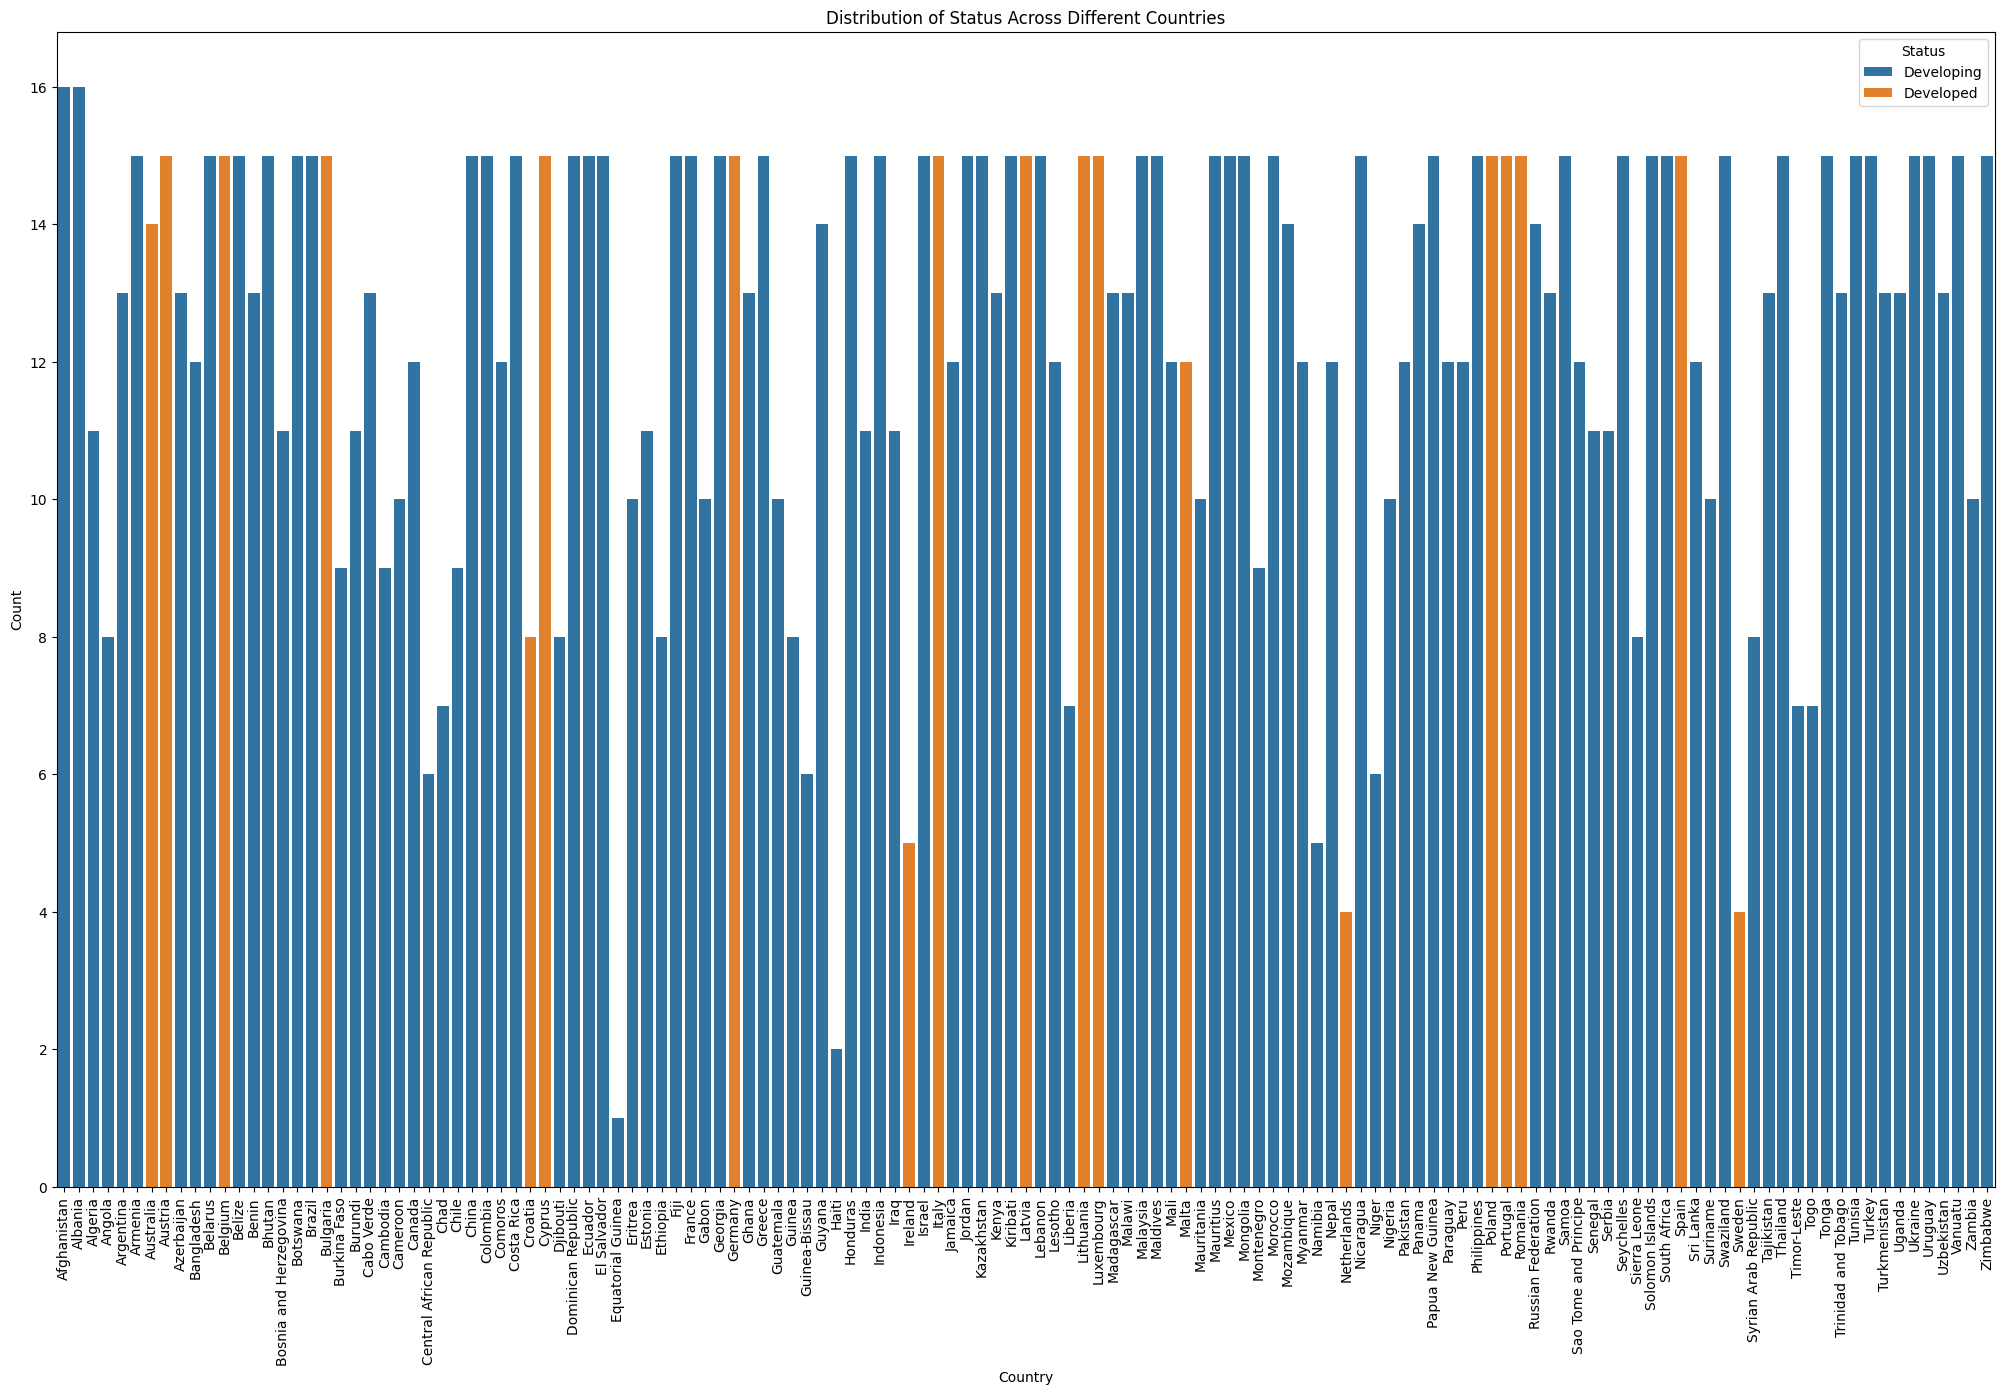

In [15]:
# Ensure that Seaborn and Matplotlib libraries are Imported

# NOw, let's create a count plot for the distribution of 'Status' across different countries
plt.figure(figsize=(25, 15))
sns.countplot(data=df, x='Country', hue='Status')
plt.title('Distribution of Status Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Status')
plt.show()

This count plot shows us the distribution of 'Status' (developed or developing) across different countries. Each bar represents the count of countries in each status category. As visualised we gain insights into how the status classification varies across countries.

QN 5. Using visuals and statistics, which variables are key in affecting the life expectancy in Uganda? 

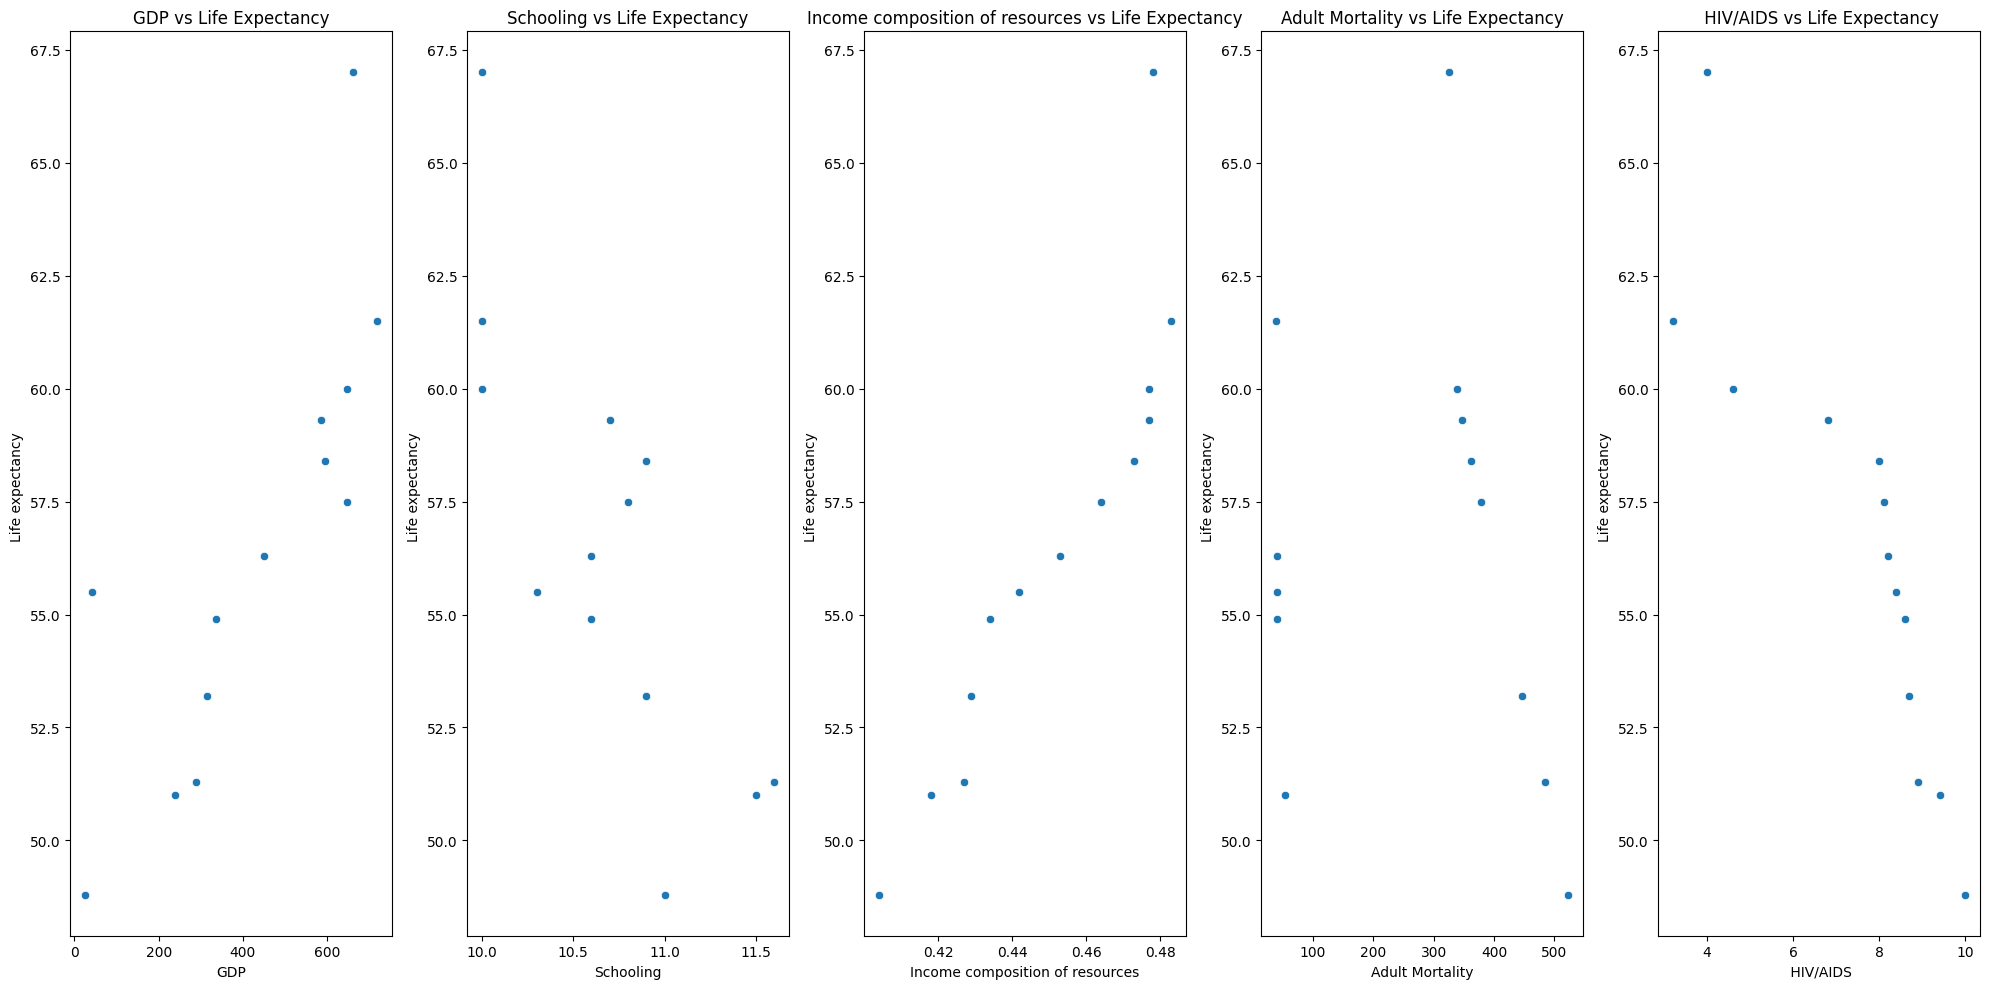

In [24]:
# First, Let us Filter out data for Uganda
uganda_data = df[df['Country'] == 'Uganda']

# Now, let us do a Visual exploration
plt.figure(figsize=(20, 10))

# Plotting scatter plots for only numerical variables with highest correlation
variables_to_plot = ['GDP', 'Schooling', 'Income composition of resources', 'Adult Mortality', ' HIV/AIDS']
for i, variable in enumerate(variables_to_plot, 1):
    # Check if the column exists in the dataset
    if variable in uganda_data.columns:
        plt.subplot(1, 5, i)
        sns.scatterplot(data=uganda_data, x=variable, y='Life expectancy ')
        plt.title(f'{variable} vs Life Expectancy')

plt.tight_layout()
plt.show()

Based on the visual exploration of the relationship between life expectancy and several key variables in Uganda, here are my findings:

GDP (Gross Domestic Product):
There appears to be a positive correlation between GDP and life expectancy. Countries with higher GDP tend to have higher life expectancy.

Schooling:
A positive correlation is observed between schooling and life expectancy. Higher levels of education (measured by average years of schooling) are associated with increased life expectancy.

Income Composition of Resources:
There seems to be a positive correlation between income composition of resources and life expectancy. This variable typically reflects the proportion of income from different sources, with higher values indicating a greater share of income from sources such as salaries and wages. Higher income composition is associated with higher life expectancy.

Adult Mortality:
There appears to be a negative correlation between adult mortality and life expectancy. Higher adult mortality rates (deaths among adults aged 15-60) are associated with lower life expectancy.

HIV/AIDS:
The relationship between HIV/AIDS prevalence and life expectancy should be explored further due to its significant impact on public health in Uganda. 

Overall, the visual exploration suggests that GDP, schooling, income composition of resources, and adult mortality are key factors affecting life expectancy in Uganda. Higher GDP, greater access to education, higher income composition, and lower adult mortality rates are associated with increased life expectancy. However, further analysis is needed to fully understand the relationship between HIV/AIDS prevalence and life expectancy in Uganda.

QN 6. Which factors are the biggest drivers of Adult mortality? 

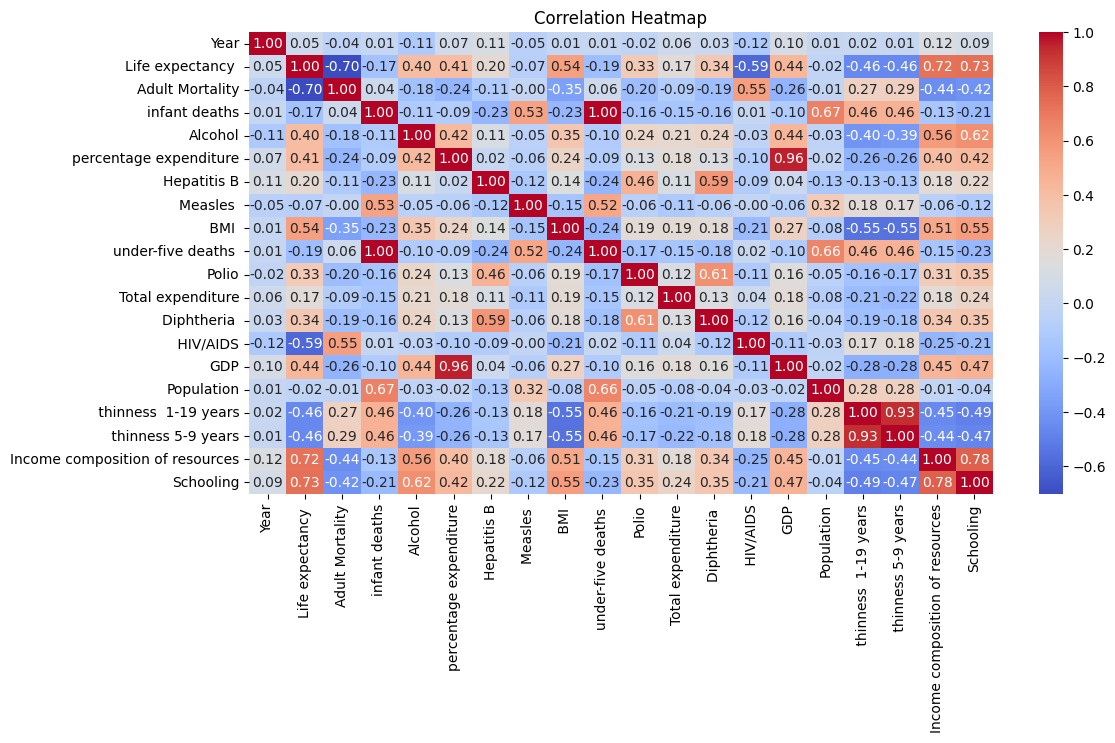

Correlation with Adult Mortality:
Adult Mortality                    1.000000
 HIV/AIDS                          0.550691
 thinness 5-9 years                0.286723
 thinness  1-19 years              0.272230
under-five deaths                  0.060365
infant deaths                      0.042450
Measles                           -0.003967
Population                        -0.015000
Year                              -0.037092
Total expenditure                 -0.085227
Hepatitis B                       -0.105225
Alcohol                           -0.175535
Diphtheria                        -0.191429
Polio                             -0.199853
percentage expenditure            -0.237610
GDP                               -0.255035
 BMI                              -0.351542
Schooling                         -0.421171
Income composition of resources   -0.442203
Life expectancy                   -0.702523
Name: Adult Mortality, dtype: float64


In [26]:
# To determine the biggest drivers of adult mortality, 
# we can perform a correlation analysis between adult mortality and other variables in the dataset. 
# Variables with a strong positive or negative correlation with adult mortality are considered as potential drivers.


# First, let us Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Our Correlation analysis
correlation_with_adult_mortality = df_numeric.corr()['Adult Mortality'].sort_values(ascending=False)

# Let us do a Visual exploration
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

print("Correlation with Adult Mortality:")
print(correlation_with_adult_mortality)

Based on the correlation analysis and heatmap visualization, here is a summary of the findings regarding the biggest drivers of adult mortality:

HIV/AIDS Prevalence:
HIV/AIDS prevalence shows a strong positive correlation with adult mortality. This suggests that higher HIV/AIDS prevalence rates are associated with increased adult mortality. This finding highlights the significant impact of HIV/AIDS on adult mortality rates.

Income Composition of Resources:
Income composition of resources exhibits a notable negative correlation with adult mortality. This implies that countries with a greater share of income from various sources, such as salaries and wages, tend to have lower adult mortality rates. Higher income composition may reflect better access to healthcare, social services, and overall socioeconomic development, which contribute to reduced adult mortality.

Schooling:
Schooling also shows a negative correlation with adult mortality, indicating that higher levels of education (measured by average years of schooling) are associated with lower adult mortality rates. Education plays a crucial role in improving health literacy, promoting healthier lifestyles, and enhancing access to healthcare services, all of which contribute to reduced mortality.

GDP (Gross Domestic Product):
GDP demonstrates a negative correlation with adult mortality, suggesting that higher GDP levels are associated with lower adult mortality rates. Countries with stronger economies may have better healthcare infrastructure, higher standards of living, and greater resources for disease prevention and treatment, leading to improved health outcomes and reduced mortality.

Income Composition of Resources:
Income composition of resources exhibits a notable negative correlation with adult mortality. This implies that countries with a greater share of income from various sources, such as salaries and wages, tend to have lower adult mortality rates. Higher income composition may reflect better access to healthcare, social services, and overall socioeconomic development, which contribute to reduced adult mortality.

These findings highlight the multifaceted nature of factors influencing adult mortality, including healthcare infrastructure, disease prevalence, socioeconomic status, and education. Addressing these factors through targeted interventions and policy measures can contribute to reducing adult mortality rates and improving overall population health.